### Hello! This is your last graded worksheet!

Meryem EL Baz

For this worksheet, we are using the data for the Higgs Boson challenge. The files are called "Higgs_features.csv" and "Higgs_labels.csv". The labels are 0 and 1, corresponding to "no Higgs signal", and "Higgs signal".

We will start with a decision tree and then move on to RFs and ERTs. Note that the next two tasks are required but not grade-bearing since you did this already!

In [1]:
import numpy as np

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.model_selection import KFold,StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

TASK: Read the data into two numpy arrays, one for features and one for labels.

In [5]:
x=np.genfromtxt("Higgs_features.txt", delimiter=',')
y=np.genfromtxt("Higgs_labels.txt", delimiter=',')
print(x)
print(y)

[[ 393.335   79.46   308.879 ...   -1.411   49.063   39.478]
 [  71.048   29.291   55.602 ...   -1.412   22.926    9.486]
 [ 141.45    87.017   72.091 ...    1.233   23.591   69.754]
 ...
 [  78.421   51.766   51.303 ...    1.108   26.775   30.509]
 [  90.507   70.86    75.535 ...   -1.41    45.511   27.279]
 [-999.      71.491   35.996 ...   -1.395   20.52    44.2  ]]
[0. 0. 0. ... 0. 0. 0.]


TASK: Use a decision tree classifier as your model, and do five fold cross validation on your data, <b> using the function cross\_val\_score and precision as the scoring parameter</b>. Report the mean and standard deviation of the scores obtained for the five folds.

In [16]:
model_1 = DecisionTreeClassifier()
scores = cross_val_score(model_1, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.63699024 0.63770686 0.62162162 0.62672018 0.63467132]
0.6315420433863715
0.006311025045583136


1\. Now you can do the same for a Random Forest Classifier with default parameters.

In [17]:
model_2=RandomForestClassifier()
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.7471831  0.76133985 0.74879227 0.74166075 0.75205479]
0.7502061524852046
0.00650443541730654


In [27]:
model_2=RandomForestClassifier()
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5)) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.8  0.82 0.8  0.81 0.8 ]
0.8073198688319947
0.006396116869117435


2\. Which model performs better "out of the box"?

3\. Let's try and diagnose the high bias/high variance for this classifier. You can import the function "check train test" from the lecture notebook and use it to evaluate the gap between train and test scores for the decision tree and for the random forest.

In [18]:
from sklearn.model_selection import train_test_split
def checktraintest(X, y, model, ntrials =5, test_size = 0.2):

    scores_train = np.zeros(ntrials)
    scores_test = np.zeros(ntrials)

    for i in range(ntrials):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=test_size, random_state=i)
        model.fit(X_train, y_train)
        pred_test = model.predict(X_test)
        pred_train = model.predict(X_train)

        scores_test[i] = (metrics.accuracy_score(y_test,pred_test))
        scores_train[i] =(metrics.accuracy_score(y_train,pred_train))

    print('Training scores '+str(scores_train.mean())+' +- '+str(scores_train.std()))
    print('Test scores '+str(scores_test.mean())+' +- '+str(scores_test.std()))

In [28]:
checktraintest(x,y,DecisionTreeClassifier())

Training scores 1.0 +- 0.0
Test scores 0.7545999999999999 +- 0.005422914345626328


In [19]:
checktraintest(x,y,RandomForestClassifier())

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training scores 0.9863799999999999 +- 0.0010047885349664383
Test scores 0.8037599999999999 +- 0.002672526894158434


4\. Based on what you saw above, do you see a high bias or high variance issue for the RF?

5\. Report the confusion matrix for the two algorithms (note: you will need to use "cross_val_predict" to generate the two vectors of predicted values for the two algorithm). What are the main differences?

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,\
                                                              test_size = 0.2,random_state=0) 
model_1.fit(xtrain,ytrain)
ypred = model_1.predict(xtest)

Confusion matrix, without normalization
[[2704  600]
 [ 599 1097]]


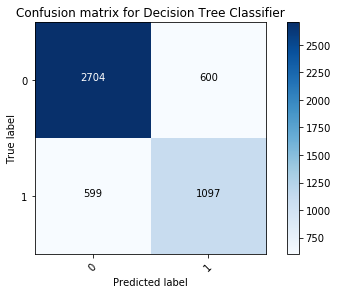

In [23]:
cnf_matrix = confusion_matrix(ytest, ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix for Decision Tree Classifier')

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,\
                                                              test_size = 0.2,random_state=0) 
model_2.fit(xtrain,ytrain)
ypred = model_2.predict(xtest)

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion matrix, without normalization
[[2947  357]
 [ 645 1051]]


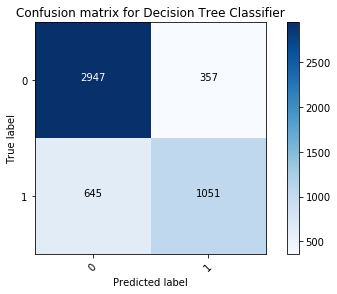

In [25]:
cnf_matrix = confusion_matrix(ytest, ypred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1'],
                      title='Confusion matrix for Decision Tree Classifier')

6\. Let's do some simple optimization: run a 5 fold CV (don't forget to shuffle the data set if needed!) with n_estimators = 10, 20, 50 and report the difference. Is it worth going beyond 50 trees in your opinion?

In [38]:
model_2=RandomForestClassifier(n_estimators=10)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5)) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.81 0.81 0.82 0.81 0.8 ]
0.8082798608943944
0.004129849908340458


In [56]:
model_2=RandomForestClassifier(n_estimators=10)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.74 0.75 0.76 0.76 0.74]
0.7517481674462745
0.007698844895097737


In [39]:
model_2=RandomForestClassifier(n_estimators=20)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5)) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.82 0.8  0.82 0.81 0.81]
0.8125196130335846
0.00807706186453969


In [57]:
model_2=RandomForestClassifier(n_estimators=20)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.76 0.74 0.74 0.75 0.74]
0.7459085768116824
0.007833694491977407


In [40]:
model_2=RandomForestClassifier(n_estimators=50)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5)) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.82 0.82 0.82 0.82 0.81]
0.8184796130751846
0.003378685625222902


In [58]:
model_2=RandomForestClassifier(n_estimators=10)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.76 0.75 0.76 0.76 0.73]
0.7532881476222321
0.010715162064307275


In [37]:
checktraintest(x,y,RandomForestClassifier(n_estimators=10))

Training scores 0.9867800000000001 +- 0.000714562803398013
Test scores 0.80636 +- 0.002440983408382801


In [35]:
checktraintest(x,y,RandomForestClassifier(n_estimators=20))

Training scores 0.99604 +- 0.00043520110293976465
Test scores 0.8124800000000001 +- 0.0032139695082561057


In [29]:
checktraintest(x,y,RandomForestClassifier(n_estimators=50))

Training scores 0.9997700000000002 +- 0.00010770329614267822
Test scores 0.81792 +- 0.004351735286066921


7\. Same as above, but change the min_sample_leaf parameter to 2, 5 and 10 and report the different scores. Also report the train/test scores using the function checktraintest. What is your preferred choice and why?

In [41]:
model_2=RandomForestClassifier(min_samples_leaf=2)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5)) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.8  0.81 0.82 0.81 0.83]
0.8118009010256362
0.008141043897184955


In [60]:
model_2=RandomForestClassifier(min_samples_leaf=2)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.74 0.74 0.73 0.75 0.74]
0.7410581227553791
0.006649657437737676


In [44]:
checktraintest(x,y,RandomForestClassifier(min_samples_leaf= 2))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training scores 0.9621300000000002 +- 0.00047180504448341353
Test scores 0.8100000000000002 +- 0.004445222154178593


In [45]:
model_2=RandomForestClassifier(min_samples_leaf=5)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5)) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.81 0.81 0.82 0.81 0.82]
0.8153606290576251
0.00586919288188612


In [61]:
model_2=RandomForestClassifier(min_samples_leaf=5)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.76 0.76 0.75 0.74 0.75]
0.7510230491485457
0.007221138770306842


In [46]:
checktraintest(x,y,RandomForestClassifier(min_samples_leaf= 5))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training scores 0.9043199999999999 +- 0.002116034026191427
Test scores 0.81684 +- 0.001790642342847957


In [63]:
model_2=RandomForestClassifier(min_samples_leaf=10)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5)) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.82 0.82 0.82 0.82 0.82]
0.8190798211231929
0.0017415528624110067


In [62]:
model_2=RandomForestClassifier(min_samples_leaf=10)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

[0.74 0.75 0.74 0.76 0.77]
0.7529325972515621
0.011375225455553542


In [47]:
checktraintest(x,y,RandomForestClassifier(min_samples_leaf= 10))

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training scores 0.87242 +- 0.0011643023662262506
Test scores 0.8184800000000001 +- 0.001047664068296717


8\. Set up and run a nested cross validation for the Random Forest with 5 outer folds and 3 inner folds. Your GridSearch CV will have the following parameters: 

parameters = {'n_estimators':[5,10,20],'min_samples_leaf':[1, 2, 5], 'min_samples_split':[2, 5, 10], 'max_features':[3,6,8]}

You can use the last example ("putting them all together") from the SVMs and Hyperparameter fitting notebook, or recycle what you did for WS4, but remember to change the scoring parameter to precision. 
#### Note that we are not making the data set smaller here!

Set n_jobs = 4 (or higher if your machine can handle it) to make sure it doesn't take forever,  and et verbose to 2 if you want to follow the progress.

#### Report the scores and parameters values of the best model.

Note: If timings are bad and this takes forever on your machine, select 20% of the original data set.

In [51]:
number_samples = x.shape[0]
Xlittle, ylittle = x[:int(number_samples*0.2),:], y[:int(number_samples*0.2)]
np.sum(ylittle > 0.5), np.sum(ylittle < 0.5)

(1684, 3316)

In [55]:
from sklearn.model_selection import GridSearchCV
import time
outercv = StratifiedKFold(n_splits=5, shuffle=True) #creates 5 disjoint splits

innercv = StratifiedKFold(n_splits=3, shuffle=True) #creates 4 disjoint splits

i=0

winning_model_scores = []

for train_index, test_index in outercv.split(Xlittle,ylittle): #This runs the outer cross validation
    
    i+=1
    
    print('Fold ' ,i, 'outer cross validation')
    
    Xlittle_train = Xlittle[train_index] #"yellow" training set
    ylittle_train = ylittle[train_index]
    
    Xlittle_test = Xlittle[test_index]
    ylittle_test = ylittle[test_index]
    
    #optimizing SVC: this replaces the inner loop!
    
    parameters = {'n_estimators':[5,10,20],'min_samples_leaf':[1, 2, 5], 'min_samples_split':[2, 5, 10], 'max_features':[3,6,8]}
    nmodels = np.product([len(el) for el in parameters.values()])
    start = time.time()
    model = GridSearchCV(RandomForestClassifier(), parameters, cv = innercv, scoring = 'precision', \
                     verbose = 1, n_jobs = 8)
    model.fit(Xlittle_train, ylittle_train)
    stop = time.time()
    print('Best params, best score:', "{:.4f}".format(model.best_score_), model.best_params_)
    print('Time per model (s):', "{:.4f}".format((stop-start)/float(nmodels*4)))

    #Compute test scores with optimal parameters on outer i-th test fold
    
    winner = model.best_estimator_
    
    winner.fit(Xlittle_train, ylittle_train)
    
    ypred = winner.predict(Xlittle_test)
    
    winning_model_scores.append(metrics.recall_score(ylittle_test,ypred)) #append this to the outer cv results
    
print('The average of the winning model scores (i.e. the generalization error) is', \
      np.mean(winning_model_scores), np.std(winning_model_scores) )


Fold  1 outer cross validation
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   20.2s
[Parallel(n_jobs=8)]: Done 243 out of 243 | elapsed:   26.3s finished


Best params, best score: 0.7493 {'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Time per model (s): 0.0832
Fold  2 outer cross validation
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   13.6s
[Parallel(n_jobs=8)]: Done 243 out of 243 | elapsed:   19.8s finished


Best params, best score: 0.7440 {'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 20}
Time per model (s): 0.0624
Fold  3 outer cross validation
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 243 out of 243 | elapsed:   19.3s finished


Best params, best score: 0.7460 {'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
Time per model (s): 0.0616
Fold  4 outer cross validation
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 243 out of 243 | elapsed:   21.7s finished


Best params, best score: 0.7470 {'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Time per model (s): 0.0679
Fold  5 outer cross validation
Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 243 out of 243 | elapsed:   20.2s finished


Best params, best score: 0.7439 {'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 20}
Time per model (s): 0.0640
The average of the winning model scores (i.e. the generalization error) is 0.6443178606754275 0.040856494435626035


9\. Fix the parameters at optimal values and run the 5 fold cross validation on the original data set. What are the scores? How big is the improvement with parameter optimization, compared with the performance obtained with standard parameters in question 1?

In [65]:
model_2=RandomForestClassifier(max_features= 6, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 20)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5), scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.75 0.74 0.73 0.77 0.73]
0.7438016985011406
0.014940021454261562


In [66]:
model_2=RandomForestClassifier(max_features= 6, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 20)
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5)) 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.81 0.81 0.81 0.82 0.81]
0.8126402049952082
0.0040920238731960825


10\. Report and plot the feature importance for this data set (use the example from the lecture notebook). 

In [71]:
model_2.fit(x,y)
model_2.feature_importances_

array([0.27, 0.18, 0.12, 0.1 , 0.07, 0.08, 0.1 , 0.08])

Feature ranking:
1. feature 0 (0.273368)
2. feature 1 (0.176972)
3. feature 2 (0.120831)
4. feature 6 (0.102322)
5. feature 3 (0.098133)
6. feature 5 (0.079529)
7. feature 7 (0.075117)
8. feature 4 (0.073728)


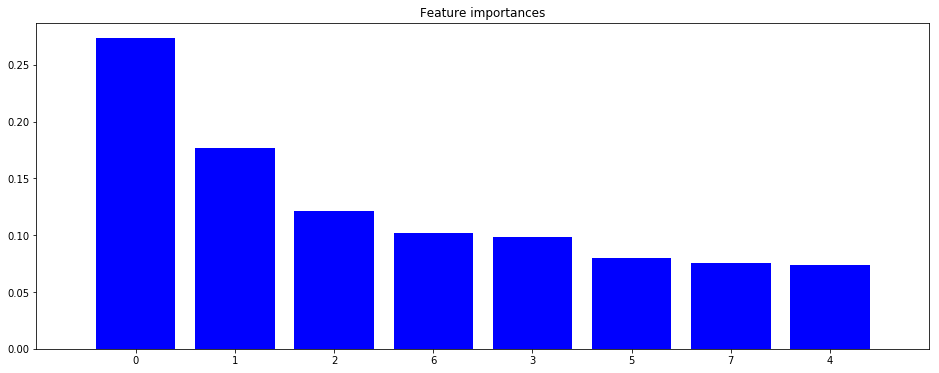

In [72]:
importances = model_2.feature_importances_
indices = np.argsort(importances)[::-1]
features=x
labels=y
# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="b", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

11\. Repeat the simple 5 fold cross validation with default parameters for Extremely Random Trees. Which model is better out of the box, RF or ERT?

In [74]:
model_3= ExtraTreesClassifier()
scores = cross_val_score(model_2, x, y, cv=StratifiedKFold(shuffle=True, n_splits=5),scoring='precision') 
print(scores) 
print(np.mean(scores))
print(np.std(scores))

[0.74 0.74 0.75 0.75 0.76]
0.7480215582170302
0.007826351305772064


12\. Report the train/test scores for RFs and ERTs. Which model has the lowest gap between train and test scores, out of the box?

In [75]:
checktraintest(x,y,RandomForestClassifier())

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training scores 0.9860299999999999 +- 0.0007915806970865122
Test scores 0.80404 +- 0.00298636903278884


In [77]:
checktraintest(x,y,ExtraTreesClassifier())

C:\Users\merye\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training scores 1.0 +- 0.0
Test scores 0.79964 +- 0.0013410443691391977


EC: On the basis of what you obtained in 10, select a threshold for the feature importance to obtain only 5 features and re-run the RF with optimal parameters on the smaller data set (again follow the example in the lecture notebook). How much does performance worsen? Would you recommend using the larger or smaller data set?

In [85]:
from sklearn.feature_selection import SelectFromModel
featuresel = SelectFromModel(model_2,threshold=0.09,prefit=True)
features_new = featuresel.transform(features) #note: only features are transformed
print(features_new.shape)

(25000, 5)


In [86]:
checktraintest(features,labels,RandomForestClassifier(max_features= 6, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 20))

Training scores 0.99573 +- 0.0006801470429252867
Test scores 0.81044 +- 0.0019365949499056561


In [88]:
checktraintest(features_new,labels,RandomForestClassifier(n_estimators=20,min_samples_leaf=5))

Training scores 0.9063699999999999 +- 0.0012106196760337268
Test scores 0.8118400000000001 +- 0.0032800000000000056
